In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
c = pd.read_csv('color.csv')['color'].values

### Sensitivity: Budget Importance

In [15]:
def superscript_text(text):
    superscript_map = {
        '0': '⁰', '1': '¹', '2': '²', '3': '³', '4': '⁴',
        '5': '⁵', '6': '⁶', '7': '⁷', '8': '⁸', '9': '⁹',
        'a': 'ᵃ', 'b': 'ᵇ', 'c': 'ᶜ', 'd': 'ᵈ', 'e': 'ᵉ',
        'f': 'ᶠ', 'g': 'ᵍ', 'h': 'ʰ', 'i': 'ⁱ', 'j': 'ʲ',
        'k': 'ᵏ', 'l': 'ˡ', 'm': 'ᵐ', 'n': 'ⁿ', 'o': 'ᵒ',
        'p': 'ᵖ', 'q': 'ᵠ', 'r': 'ʳ', 's': 'ˢ', 't': 'ᵗ',
        'u': 'ᵘ', 'v': 'ᵛ', 'w': 'ʷ', 'x': 'ˣ', 'y': 'ʸ',
        'z': 'ᶻ', '+': '⁺', '-': '⁻', '=': '⁼', '(': '⁽',
        ')': '⁾', '/': '⁄', ' ': ' ', 'R': ''
    }
    return ''.join(superscript_map.get(char, char) for char in text.lower())
gamma_symbol = '\u03B3'

In [315]:
data = pd.read_csv('Sunnyside-report.csv')
bm = data['Settings'] == 'Budget Importance'
vm = data['Settings'] == 'VoLL'
tm = data['Settings'] == 'TransMax'

In [313]:
def make_radar_chart(stats, x_range, param, color):
    fig = plt.figure(figsize=(15, 4), dpi=300)
    labels = [f'RM{superscript_text("rob")}', f'RM{superscript_text("Red")}', f'RM{superscript_text("Res")}']
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False) # generate angles
    angles = [(a + np.deg2rad(30)) % (2 * np.pi) for a in angles]
    angle = np.concatenate((angles,[angles[0]]))
    label =np.concatenate((labels,[labels[0]]))
    for i in range(4):
        ax = fig.add_subplot(int(f'14{i+1}'), polar=True)
        stat = np.concatenate((stats[i],[stats[i][0]]))
        ax.plot(angle, stat, 'o-', linewidth=2, color=c[color], alpha=0.5)
        ax.fill(angle, stat, color=c[color], alpha=0.4)
        ax.set_thetagrids(angle * 180/np.pi, label)
        plt.ylim([0, 1.1])
        plt.yticks([0.2, 0.4, 0.6, 0.8])
        ax.set_title(f'{gamma_symbol}{superscript_text(param)}: {x_range[i]}')
        ax.grid(True)
    plt.savefig(f'../IMG/Resilience Sensitivity-{param}.jpg', bbox_inches='tight')

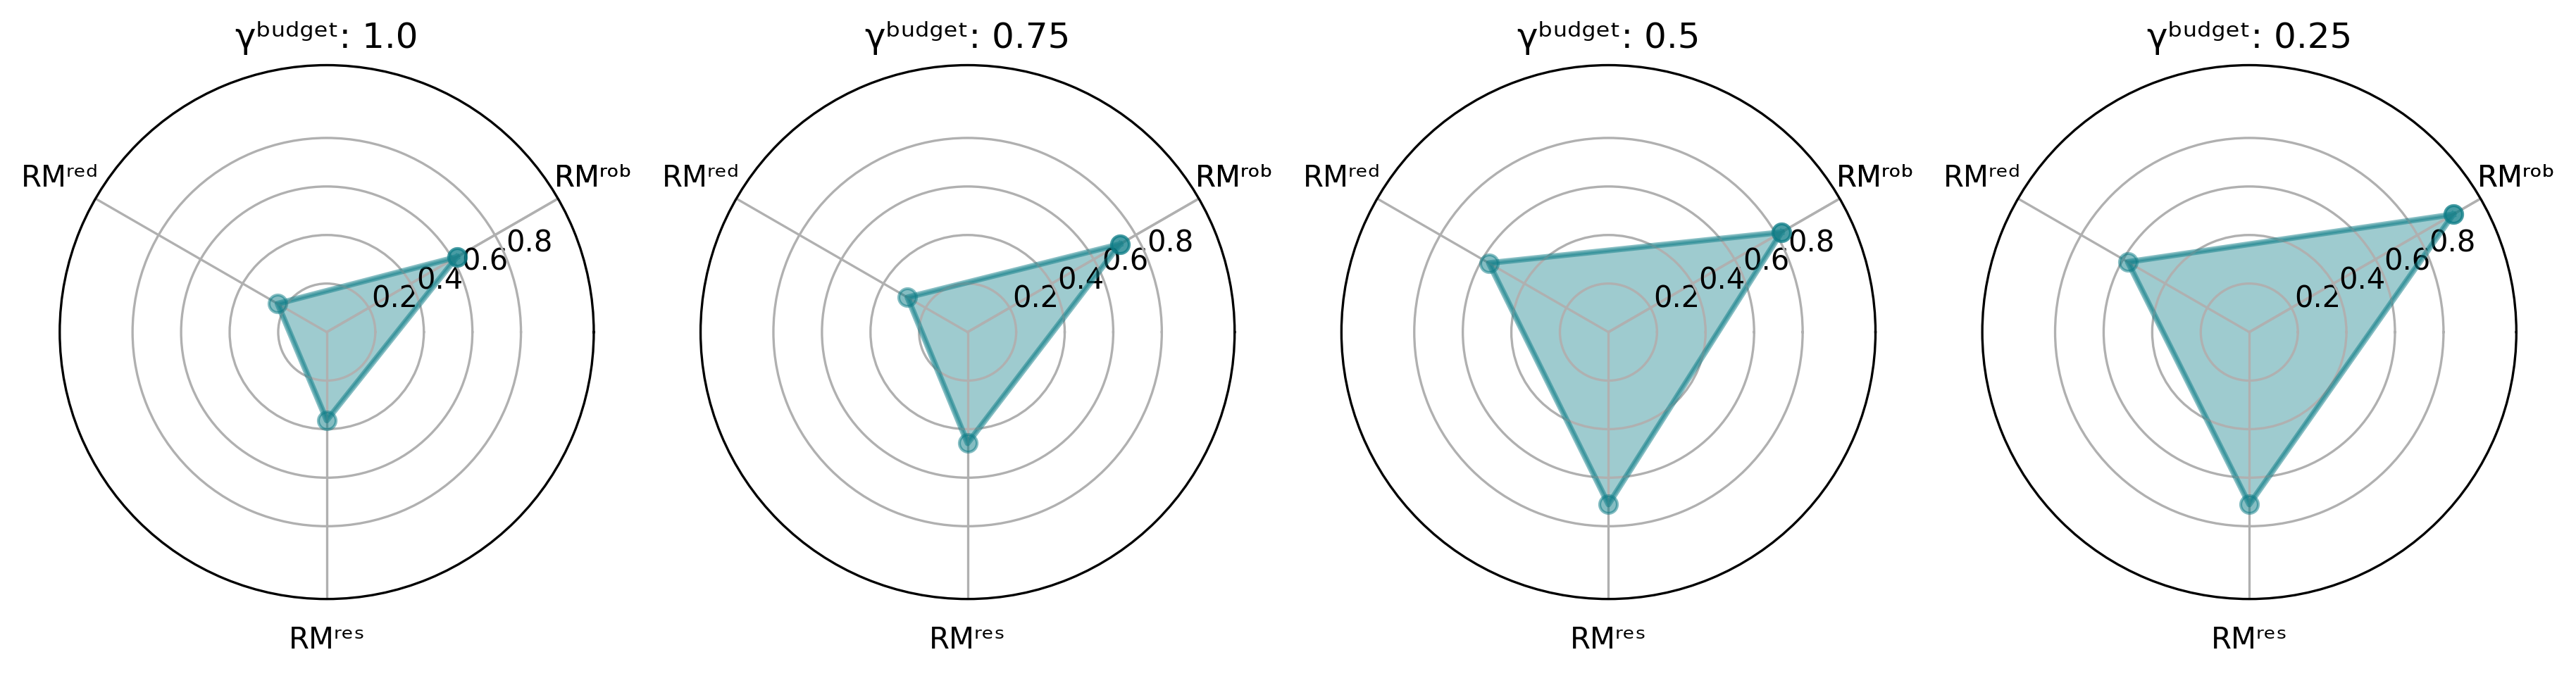

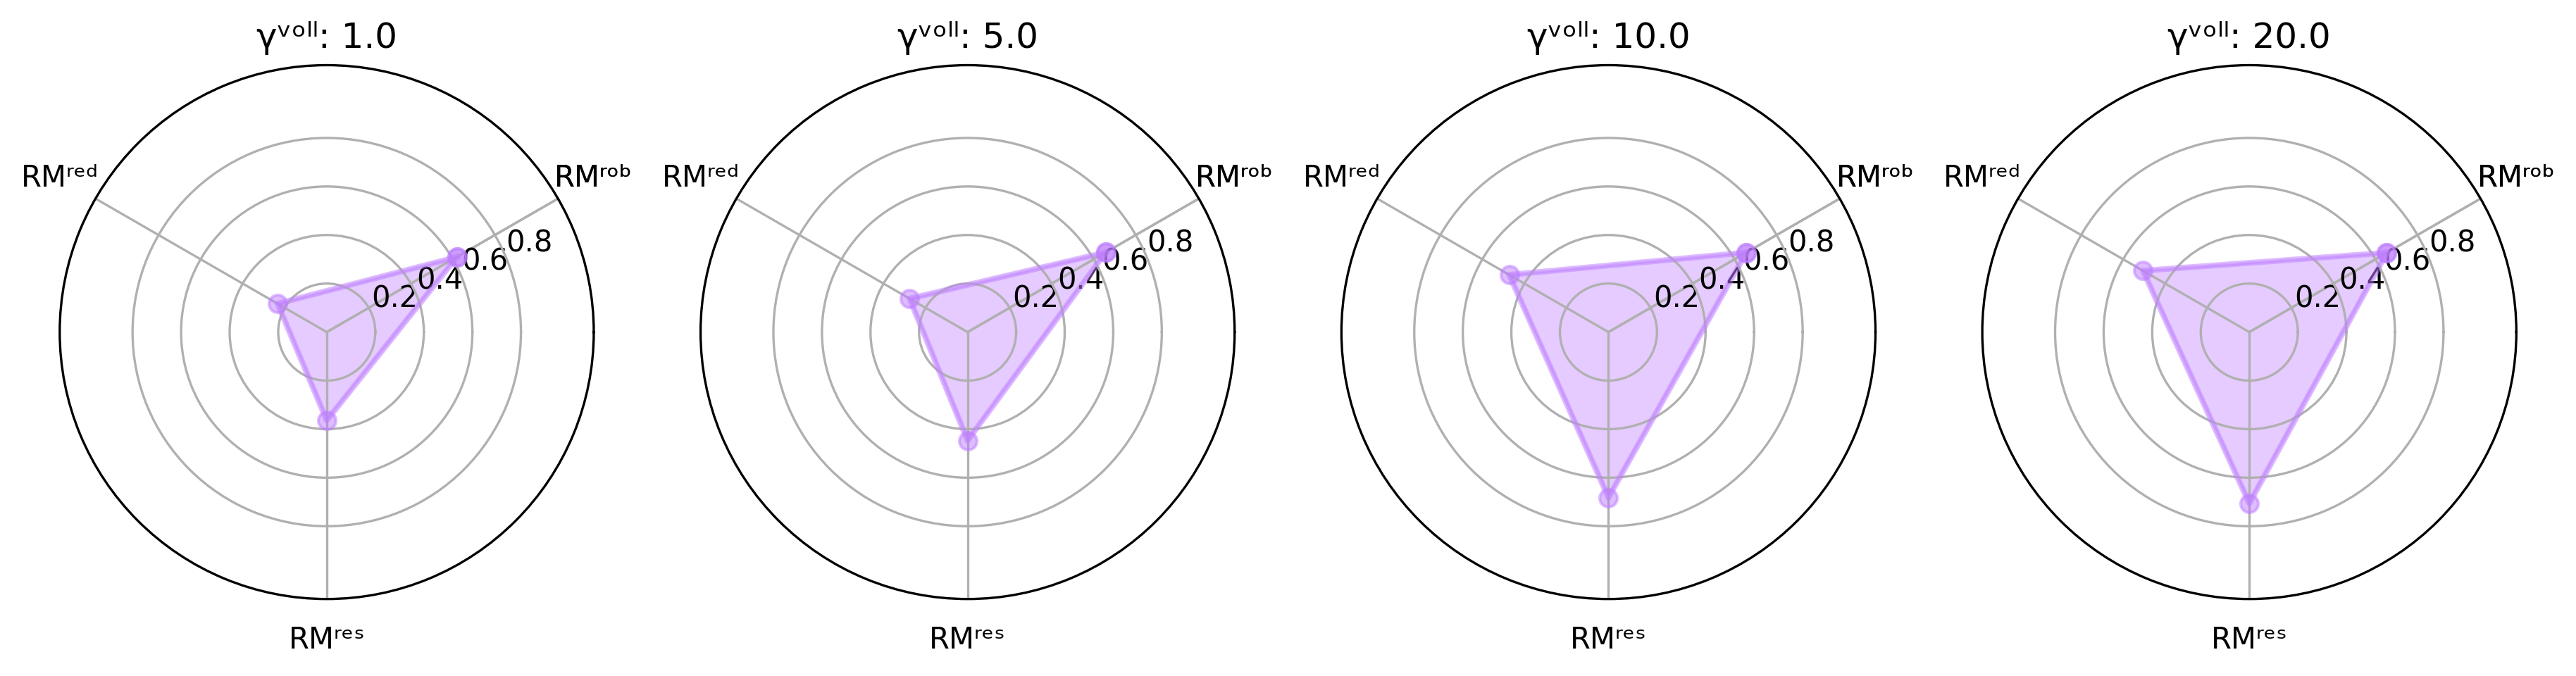

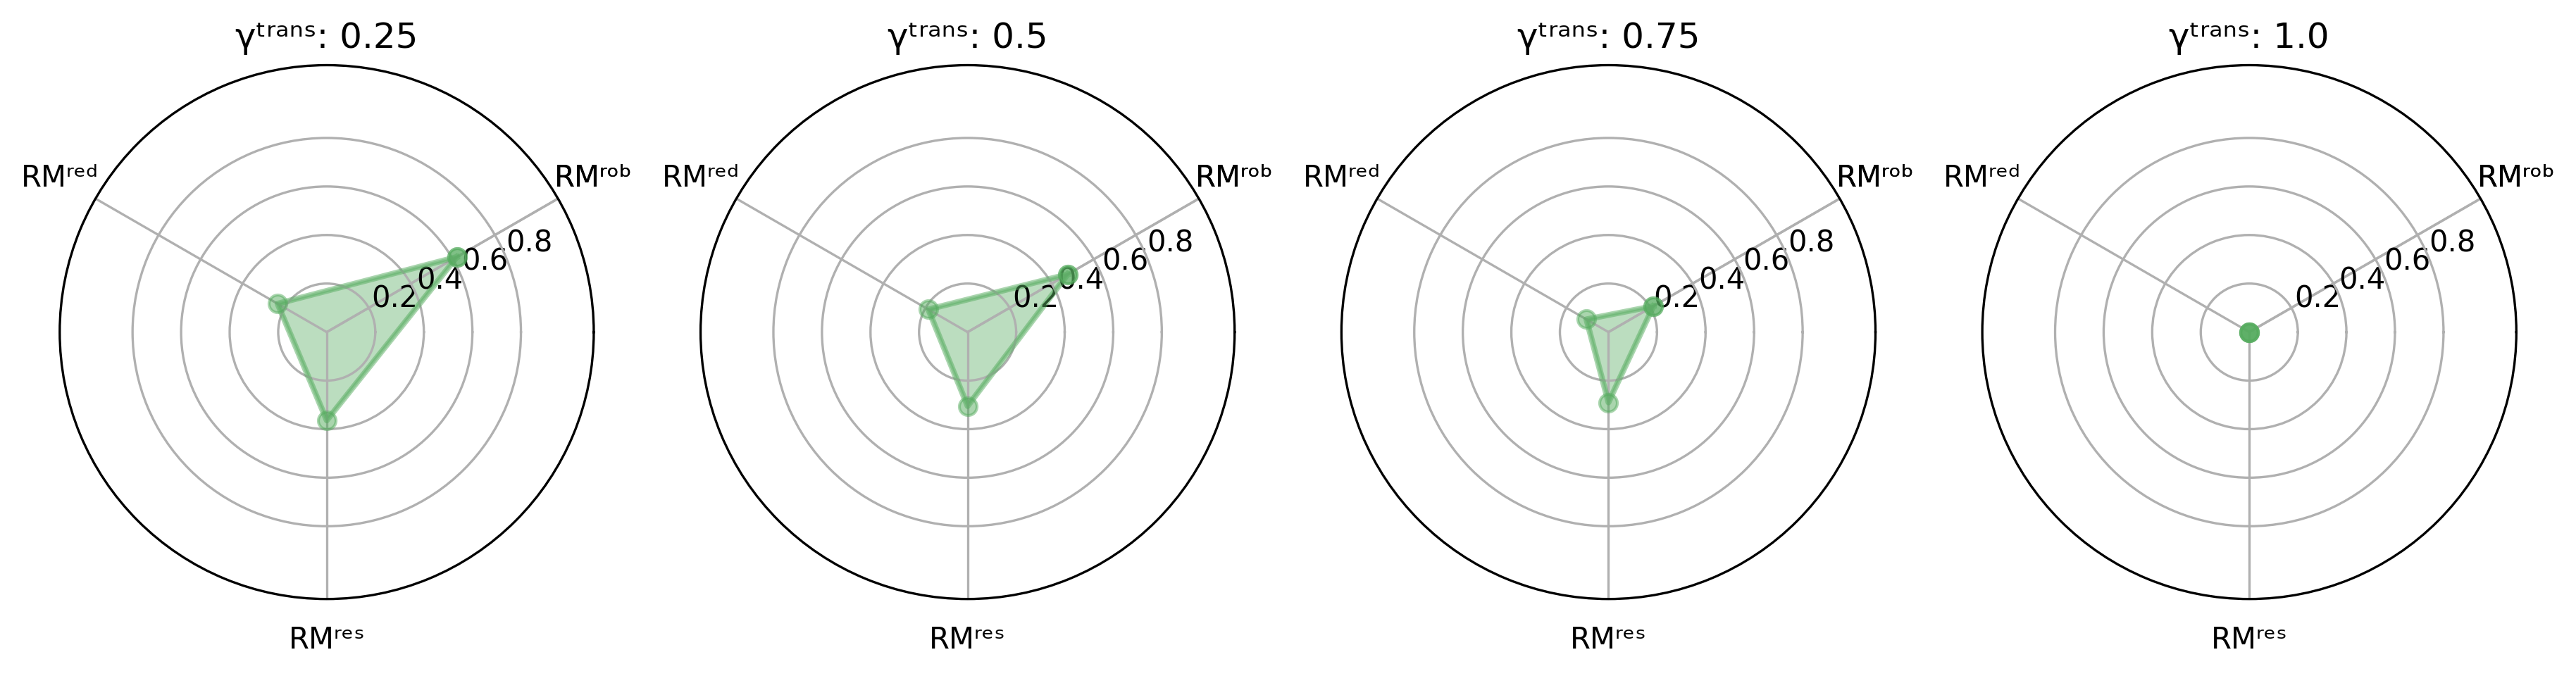

In [316]:
make_radar_chart(stats=[[data[bm]['Robustness'].iloc[i], data[bm]['Redundancy'].iloc[i],	data[bm]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[bm]))],
                        x_range=data[bm]['Value'].values,
                        param='Budget', color=1)
make_radar_chart(stats=[[data[vm]['Robustness'].iloc[i], data[vm]['Redundancy'].iloc[i],	data[vm]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[vm]))],
                        x_range=data[vm]['Value'].values,
                        param='VoLL', color=2)
make_radar_chart(stats=[[data[tm]['Robustness'].iloc[i], data[tm]['Redundancy'].iloc[i],	data[tm]['Resourcefulness'].iloc[i]]
                        for i in range(len(data[tm]))],
                        x_range=data[tm]['Value'].values,
                        param='Trans', color=3)

### Sensitivity Chart

In [298]:
def Sensitivity(tables, params=None):
    plt.figure(figsize=(15, 9), dpi=300)
    for i in range(4):
        plt.subplot(2, 2, i+1)
        cols, color_i = tables[i].columns, 0
        y_max = 0
        for j in cols[1:]:
            plt.plot(tables[i][cols[0]], tables[i][j], marker='d', c=c[color_i], label=j)
            if y_max < int(np.max(tables[i][j].values)/1000000)+1:
                y_max = int(np.max(tables[i][j].values)/1000000)+1
            color_i+= 1
        split = {4:17, 3:16, 2:11, 1:11}
        plt.xticks(tables[i][cols[0]])
        plt.yticks(np.linspace(0, y_max*1e6, split[y_max]), [f'{j:0.2f}M' for j in np.linspace(0, y_max, split[y_max])])
        plt.xlabel(f'{gamma_symbol}{superscript_text(params[i])}')
        plt.ylabel('Budget Spent ($)')
        plt.grid(True, which='both', color=c[-1], alpha=0.3)
        plt.legend()
    plt.savefig('../IMG/Sensitivity_InvRein.jpg', bbox_inches='tight')

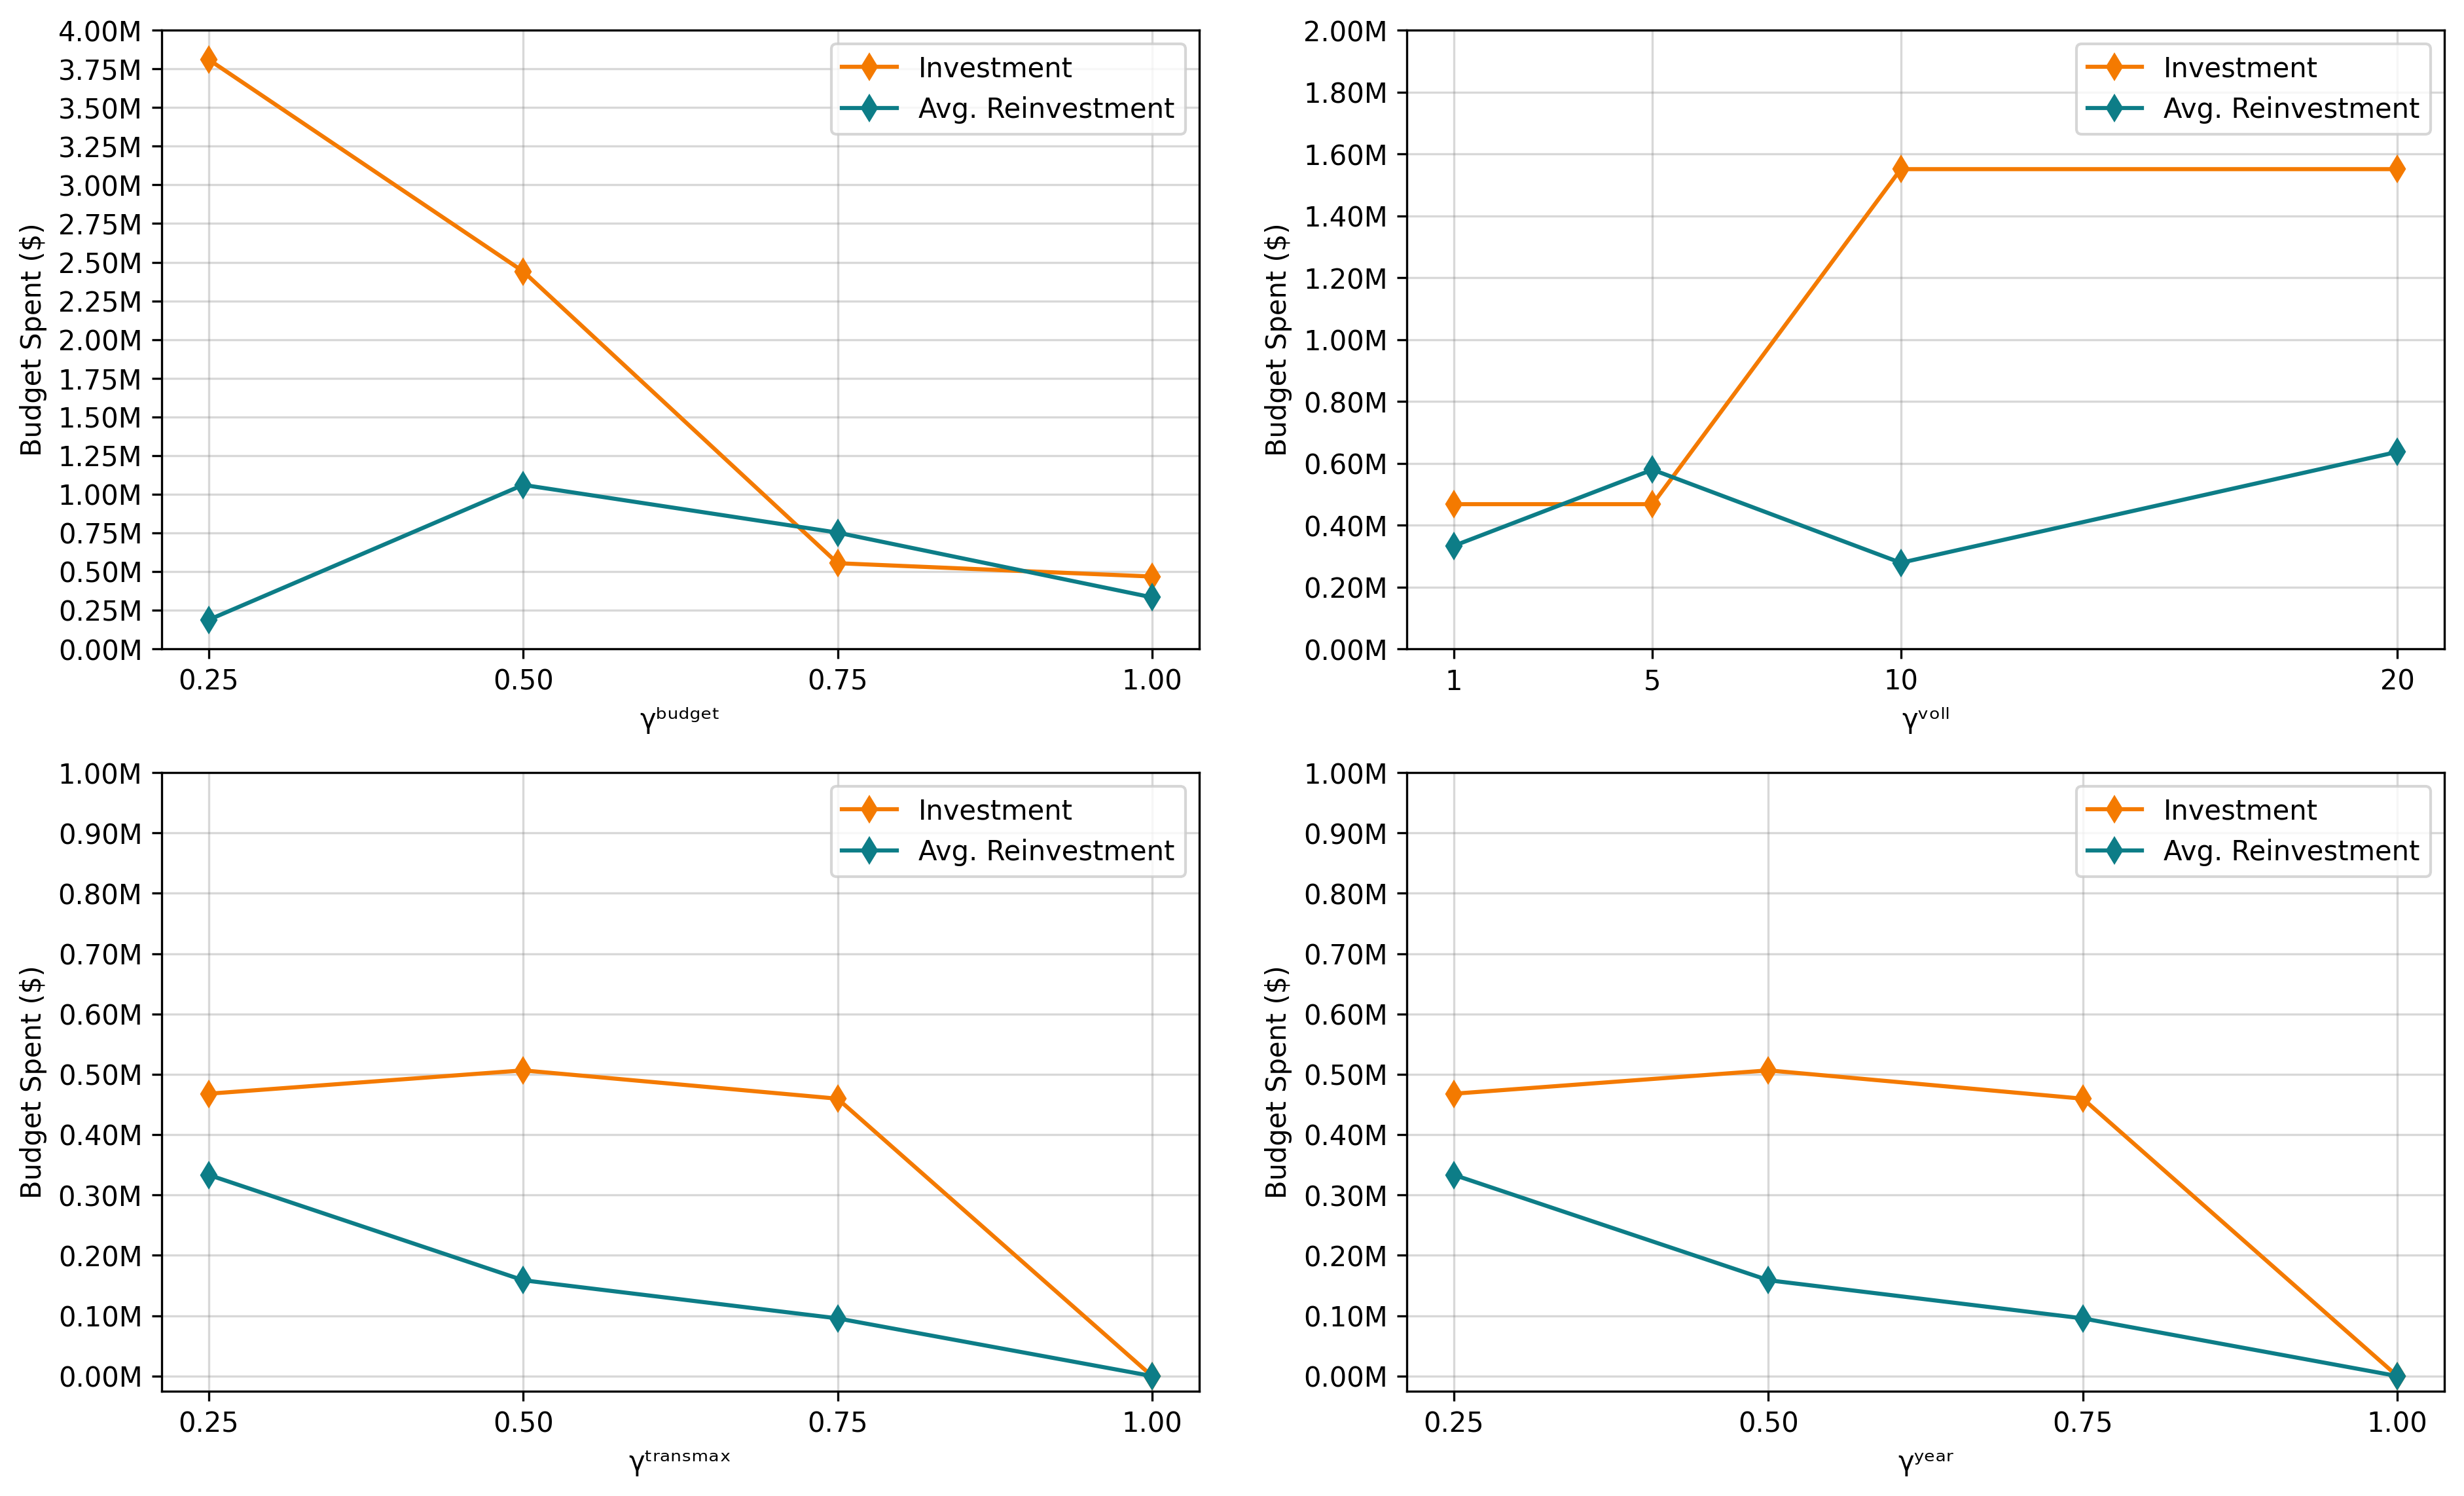

In [299]:
bt = pd.DataFrame({'x_range': [0.25, 0.5, 0.75, 1],
                  'Investment': data[bm]['Investment'][::-1],
                  'Avg. Reinvestment': data[bm]['Reinvestment'][::-1]})
vt = pd.DataFrame({'x_range': [1, 5, 10, 20],
                  'Investment': data[vm]['Investment'],
                  'Avg. Reinvestment': data[vm]['Reinvestment']})
tt = pd.DataFrame({'x_range': [0.25, 0.5, 0.75, 1],
                  'Investment': data[tm]['Investment'],
                  'Avg. Reinvestment': data[tm]['Reinvestment']})
ty = pd.DataFrame({'x_range': [0.25, 0.5, 0.75, 1],
                  'Investment': data[tm]['Investment'],
                  'Avg. Reinvestment': data[tm]['Reinvestment']})
Sensitivity([bt, vt, tt, ty], ['Budget','VoLL','TransMax', 'Year'])

### Action Plans

In [262]:
def Sensitivity_kW(tables, params=None):
    plt.figure(figsize=(20, 4.5), dpi=300)
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.bar(tables[i]['x_range'][0], tables[i]['ES'][0], color=c[0], label='ES 1')
        plt.bar(tables[i]['x_range'][0], tables[i]['ES'][1], color=c[1], label='ES 2')
        plt.xlabel(f'{gamma_symbol}{superscript_text(params[i])}')
        plt.ylabel('Budget Spent ($)')
        plt.grid(True, which='both', color=c[-1], alpha=0.3)
        plt.legend()
    plt.savefig('../IMG/Sensitivity_kW.jpg', bbox_inches='tight')

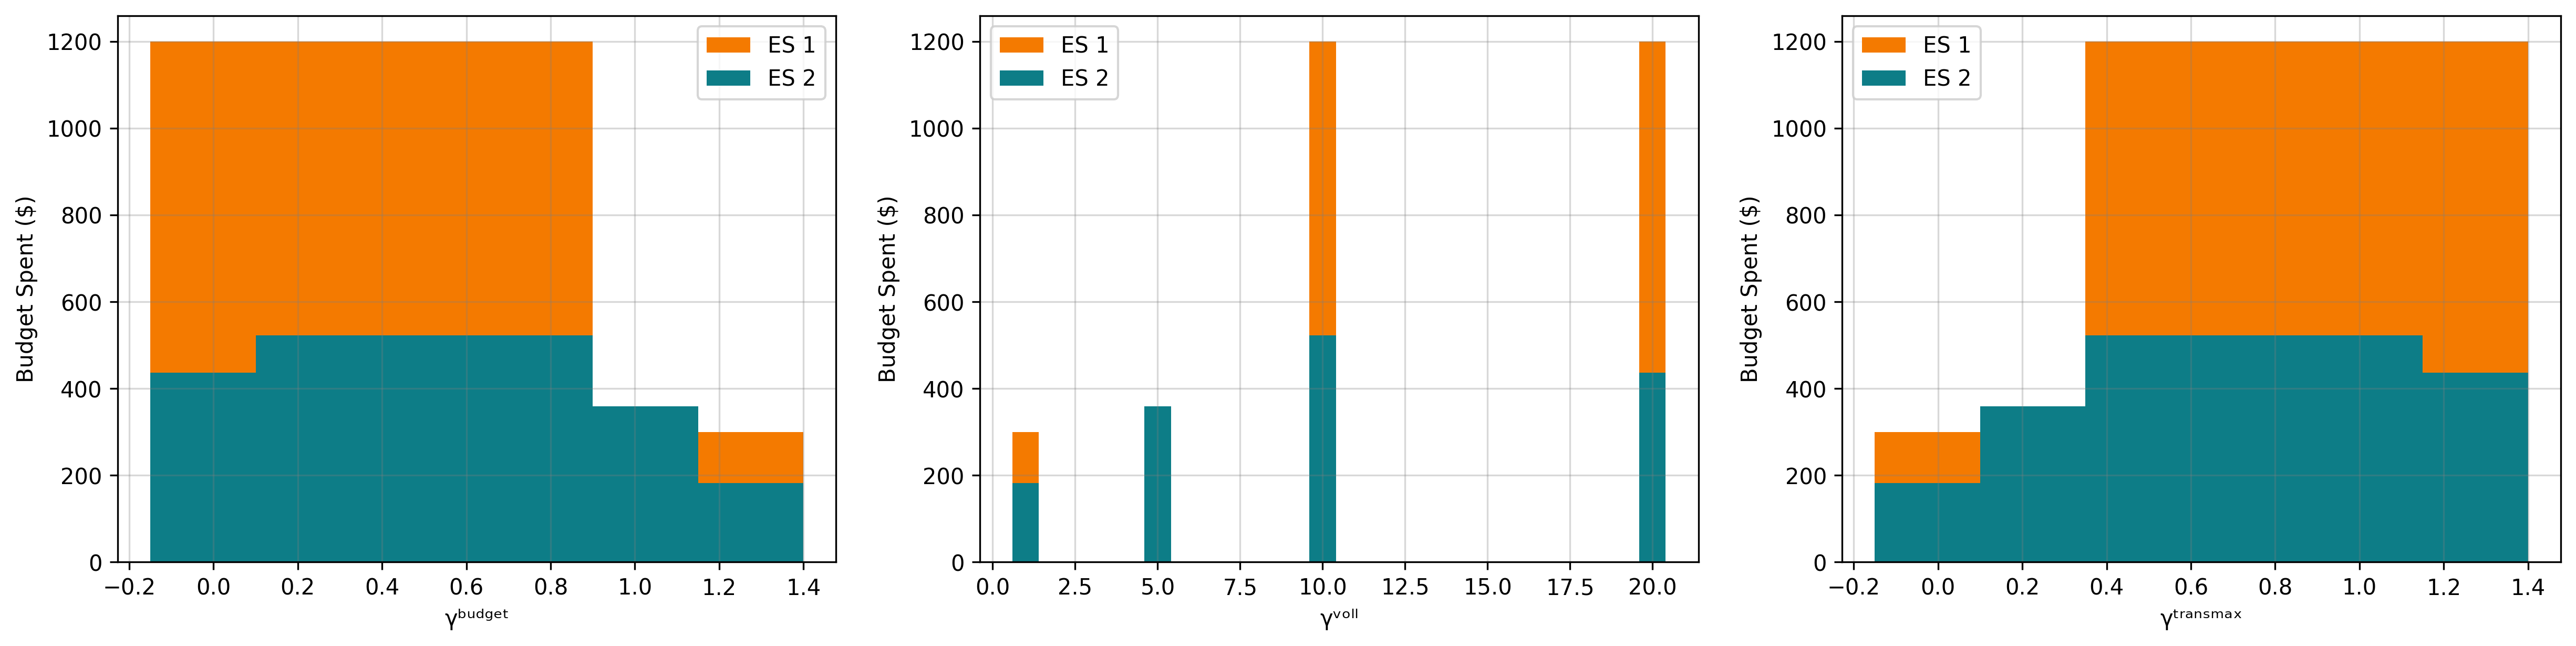

In [263]:
bt = {'x_range': [[0.25, 0.5, 0.75, 1], [0.25, 0.5, 0.75, 1]],
                  'ES': [table[bm][f'ES{i}'].values[::-1] for i in (1, 2)],
                  'PV': [table[bm][f'PV{i}'].values[::-1] for i in (1, 2)],
                  'DG': [table[bm][f'DG{i}'].values[::-1] for i in (1, 2)]}
vt = {'x_range': [[1, 5, 10, 20],[1, 5, 10, 20]],
                  'ES': [table[bm][f'ES{i}'].values for i in (1, 2)],
                  'PV': [table[bm][f'PV{i}'].values for i in (1, 2)],
                  'DG': [table[bm][f'DG{i}'].values for i in (1, 2)]}
tt = {'x_range': [[0.25, 0.5, 0.75, 1], [0.25, 0.5, 0.75, 1]],
                  'ES': [table[bm][f'ES{i}'].values for i in (1, 2)],
                  'PV': [table[bm][f'PV{i}'].values for i in (1, 2)],
                  'DG': [table[bm][f'DG{i}'].values for i in (1, 2)]}
Sensitivity_kW([bt, vt, tt], ['Budget','VoLL','TransMax'])